# Clustering Notebook

## Imports

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
pd.set_option('display.max_rows', 200)
from tqdm.notebook import tqdm

## Functions

In [ ]:
def find_optimal_clusters_k_means(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

In [ ]:
def find_optimal_clusters_dbscan(X):
    cluster = []
    error = []
    for eps in tqdm(np.arange(0.01, 2, 0.005)):
        clusters = DBSCAN(eps=eps, min_samples=5, metric='euclidean').fit_predict(X)
        cluster.append(len(set(clusters)))
        error.append(len(clusters[clusters == -1]))

    plt.figure(figsize=(10,8))
    plt.plot(np.arange(0.01, 2, 0.005), cluster)
    plt.xlabel("eps-Value")
    plt.ylabel('# Classes')
    plt.show()
    plt.figure(figsize=(10,8))
    plt.plot(np.arange(0.01, 2, 0.005), error)
    plt.xlabel("eps-Value")
    plt.ylabel('# Outliers')
    plt.show()

In [ ]:
def plot_tsne_pca_lda(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    max_items = 1000

    pca = PCA(n_components=2).fit_transform(data.todense())
    tsne = TSNE(n_components=2).fit_transform(PCA().fit_transform(data.todense()))
    lda = LDA(n_components=2).fit_transform(data.todense(), labels)
    
    #print(pca.shape[0])
    
    idx = np.random.choice(range(pca.shape[0]), size=max_items, replace=False)
    label_subset = [cm.hsv(i/max_label) for i in labels[idx]]
    
    f, ax = plt.subplots(1, 3, figsize=(30, 10))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

    ax[2].scatter(lda[idx, 0], lda[idx, 1], c=label_subset)
    ax[2].set_title('LDA Cluster Plot')

In [ ]:
def plot_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    max_items = 1000

    pca = PCA(n_components=2).fit_transform(data.todense())

    plt.figure(figsize=(10,8))
    plt.scatter(pca[:, 0], pca[:, 1], c=labels)
    plt.title('PCA Cluster Plot')

## TF-IDF Vectorization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mails_prepared.csv', index_col=0)

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True, stop_words='english'
)
df.dropna(subset=['Body_processed'],inplace=True)

word_vectorizer.fit(df['Body_processed'])
X = word_vectorizer.transform(df['Body_processed'])

## K-Means

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


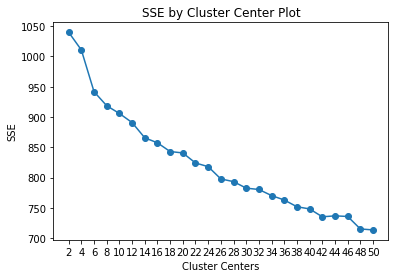

In [ ]:
find_optimal_clusters_k_means(X, 50)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)
df['cluster'] = clusters

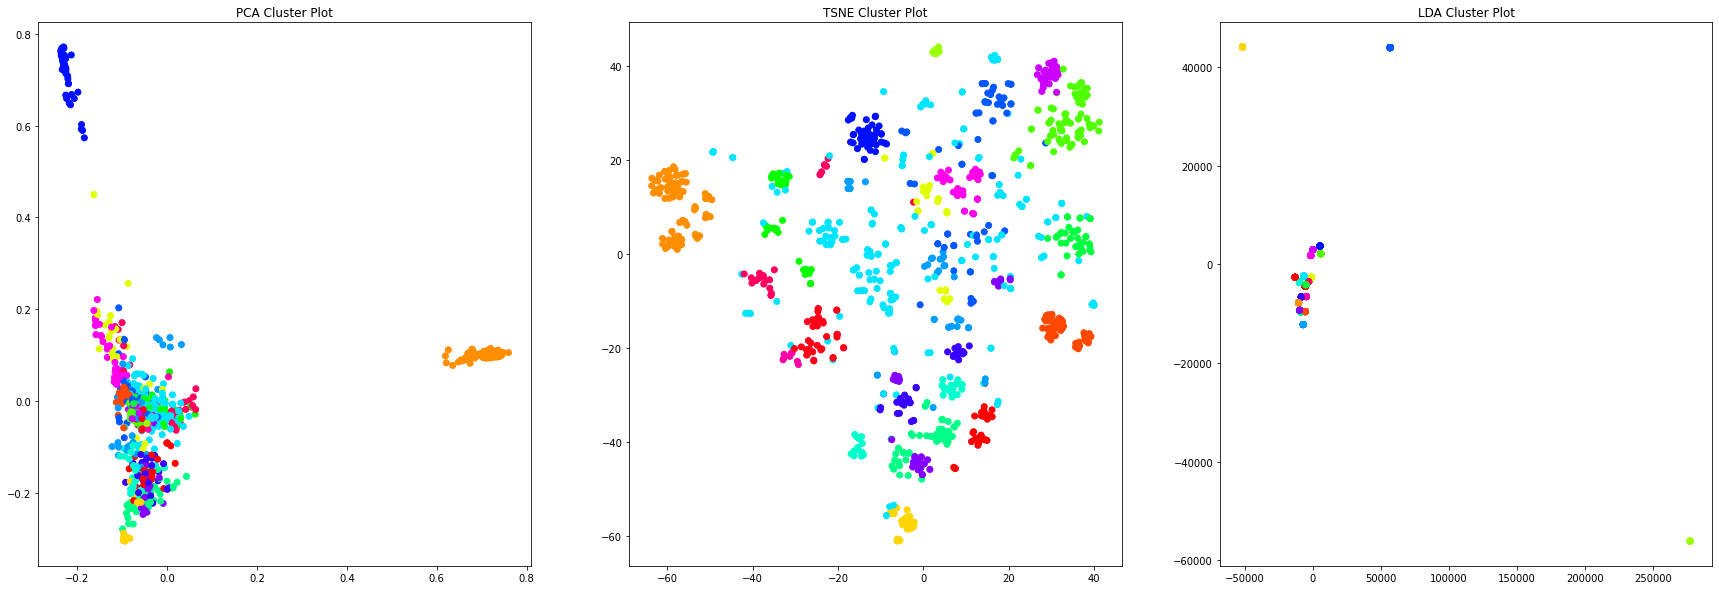

In [ ]:
plot_tsne_pca_lda(X, clusters)

In [ ]:
df[df.cluster == 1]

,Subject,SenderAddress,SenderName,CCAddresses,Body,Header,Body_processed,cluster
4,Reminder to evaluate Research Project DSDM 2 (...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Second reminder\n\nDear student,\n\nLet your v...",Received=from UM-MAIL3215.unimaas.nl (137.120....,"['reminder', 'evaluate', 'research', 'project'...",1
5,Reminder to evaluate Algorithms for Big Data,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Second reminder\n\nDear student,\n\nLet your v...",Received=from UM-MAIL3218.unimaas.nl (137.120....,"['reminder', 'evaluate', 'algorithms', 'big', ...",1
6,Reminder to evaluate Advanced Natural Language...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Second reminder\n\nDear student,\n\nLet your v...",Received=from UM-MAIL3211.unimaas.nl (137.120....,"['reminder', 'evaluate', 'advanced', 'natural'...",1
12,Request to evaluate your period 4 courses: Com...,notifications@instructure.com,Communication DKE,NaN,"Dear student,\n\nHere is a kind reminder to ev...",Received=from UM-MAIL3216.unimaas.nl (137.120....,"['request', 'evaluate', 'period', 'course', 'c...",1
19,Reminder to evaluate Advanced Natural Language...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"First reminder\n\nDear student,\n\nHere is a k...",Received=from UM-MAIL3213.unimaas.nl (137.120....,"['reminder', 'evaluate', 'advanced', 'natural'...",1
20,Reminder to evaluate Algorithms for Big Data,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"First reminder\n\nDear student,\n\nHere is a k...",Received=from UM-MAIL3212.unimaas.nl (137.120....,"['reminder', 'evaluate', 'algorithms', 'big', ...",1
21,Reminder to evaluate Research Project DSDM 2 (...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"First reminder\n\nDear student,\n\nHere is a k...",Received=from UM-MAIL3212.unimaas.nl (137.120....,"['reminder', 'evaluate', 'research', 'project'...",1
32,Evaluation of Advanced Natural Language Proces...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Dear student,\n\nYou are able to evaluate Adva...",Received=from UM-MAIL3209.unimaas.nl (137.120....,"['evaluation', 'advanced', 'natural', 'languag...",1
33,Evaluation of Algorithms for Big Data - Your o...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Dear student,\n\nYou are able to evaluate Algo...",Received=from UM-MAIL3216.unimaas.nl (137.120....,"['evaluation', 'algorithms', 'big', 'data', 'o...",1
34,Evaluation of Research Project DSDM 2 (Period ...,dke-iwio@maastrichtuniversity.nl,dke-iwio@maastrichtuniversity.nl,NaN,"Dear student,\n\nYou are able to evaluate Rese...",Received=from UM-MAIL3210.unimaas.nl (137.120....,"['evaluation', 'research', 'project', 'dsdm', ...",1


## DBSCAN

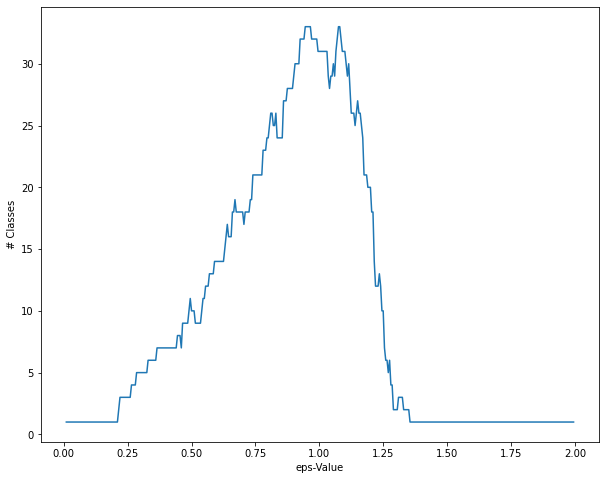

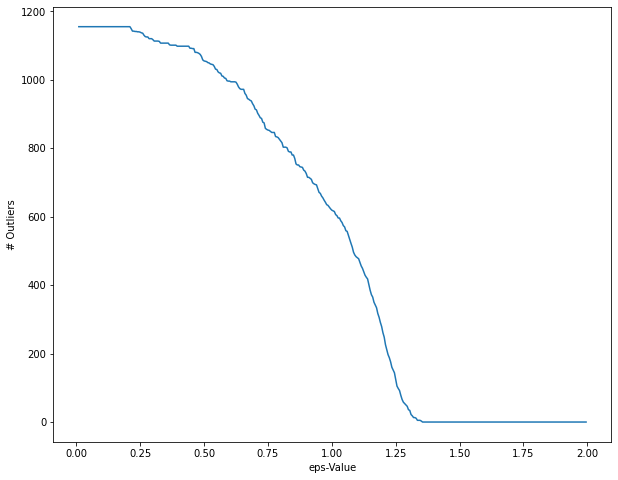

In [ ]:
find_optimal_clusters_dbscan(X)

In [ ]:
clusters = DBSCAN(eps=1.15, min_samples=5, metric='euclidean').fit_predict(X)
df['cluster'] = clusters
print(set(clusters))
print(len(clusters[clusters == -1]))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, -1}
385


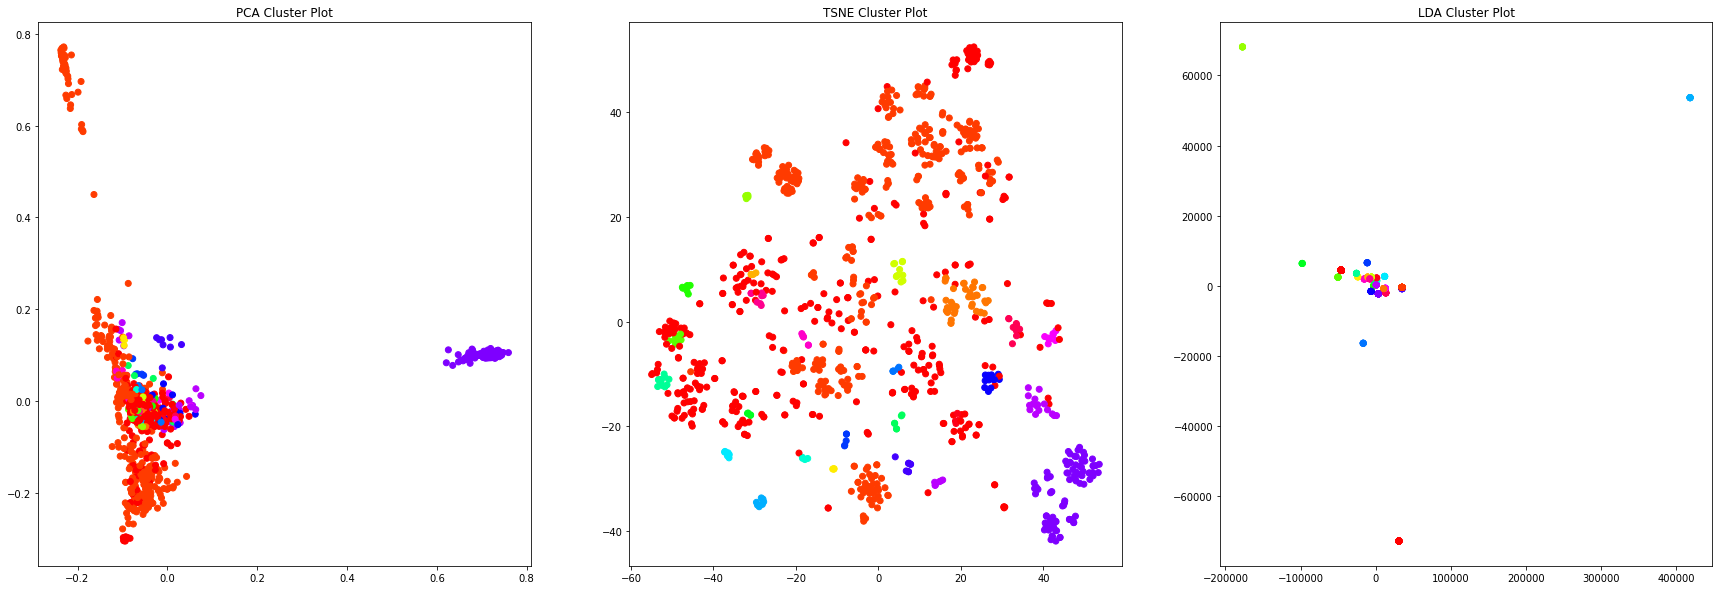

In [ ]:
plot_tsne_pca_lda(X, clusters)

In [ ]:
df[df.cluster == 25]

,Subject,SenderAddress,SenderName,CCAddresses,Body,Header,Body_processed,cluster
929,Data Analysis (2019-2020-400-KEN3450): Follow ...,jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Hi all,\n\nPlease do follow the updates (incl....",Received=from UM-MAIL3216.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25
1030,Data Analysis (2019-2020-400-KEN3450): #datama...,jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Hi all,\n\nAs mentioned in slack, in case some...",Received=from UM-MAIL3218.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25
1042,Data Analysis (2019-2020-400-KEN3450): Reminde...,jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Hi all,\n\nThis is a gentle reminder that tomo...",Received=from UM-MAIL3211.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25
1052,Data Analysis (2019-2020-400-KEN3450): Deliver...,jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Hi all,\n\nIn these times of uncertainty, I un...",Received=from UM-MAIL3211.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25
1068,Data Analysis (2019-2020-400-KEN3450): Timeser...,jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Dear hopefully-still-healthy data scientists,\...",Received=from UM-MAIL3218.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25
1120,"Data Analysis (2019-2020-400-KEN3450): slack, ...",jerry.spanakis@maastrichtuniversity.nl,Jerry Spanakis - jerry.spanakis@maastrichtuniv...,NaN,"Hi all,\n\nWhile you are busy with completing ...",Received=from UM-MAIL3210.unimaas.nl (137.120....,"['data', 'analysis', '2019', '2020', '400', 'k...",25


## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward').fit_predict(X.todense())
df['cluster'] = clusters

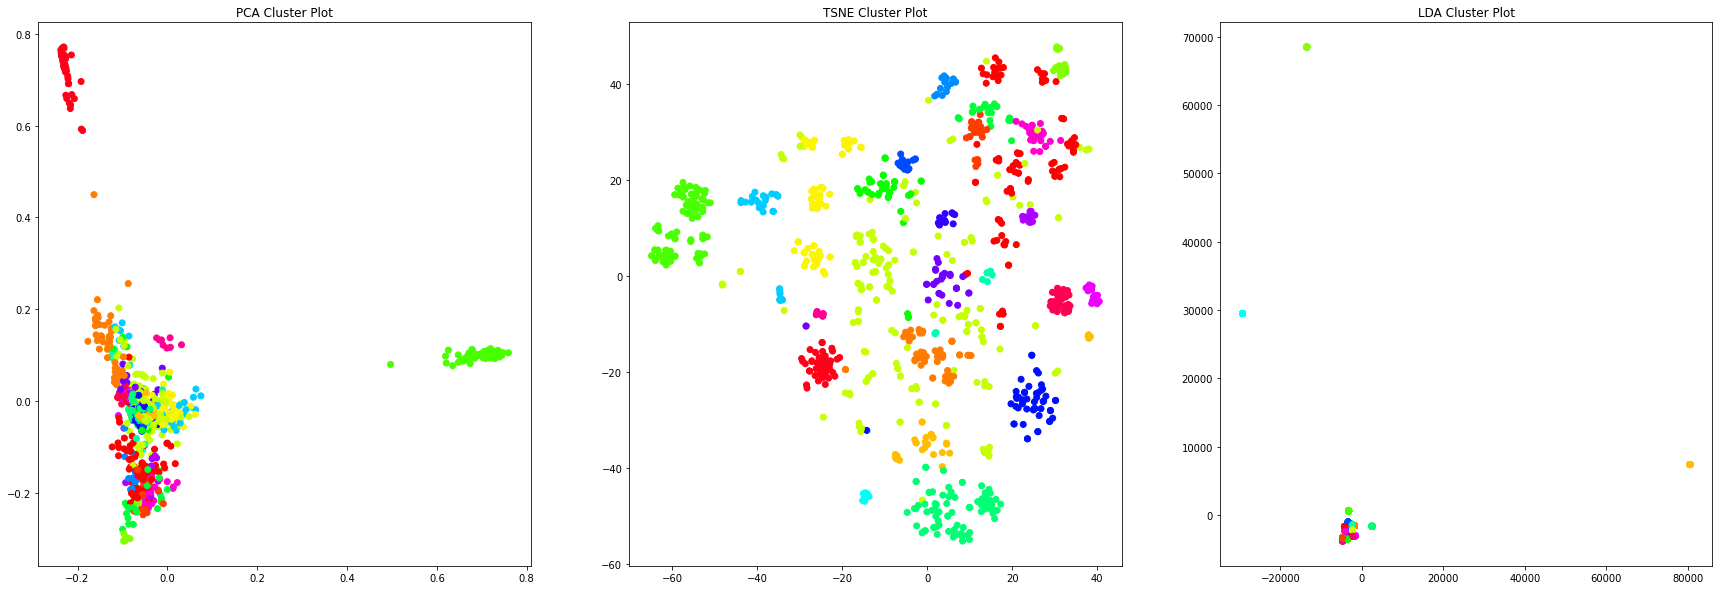

In [ ]:
plot_tsne_pca_lda(X, clusters)

In [ ]:
df[df.cluster == 7]

,Subject,SenderAddress,SenderName,CCAddresses,Body,Header,Body_processed,cluster
764,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3216.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
765,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3216.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
766,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3211.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
767,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3211.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
770,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3215.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
771,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3214.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
789,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3217.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
792,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3215.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
796,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3214.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
797,Submission received,No-reply@maastrichtuniversity.nl,No-reply@maastrichtuniversity.nl,NaN,Your work was received!\n\nYou successfully su...,Received=from UM-MAIL3217.unimaas.nl (137.120....,"['submission', 'receive', 'no-reply@maastricht...",7
